In [1]:
import os
import numpy as np
import scipy.optimize as so
import matplotlib.pyplot as plt
plt.clf()
plt.close('all')
plt.style.use('classic')
import csv
import pandas as pd
import ROOT as r
%jsroot on
import seaborn as sns

Welcome to JupyROOT 6.26/02


In [2]:
# file

def read_file(user):
    if user=='nicola':
        dirname = '/Users/nicola/Desktop/Advanced Laboratory A/data/20220517/252Cf_CLYC_both_COINCIDENCE_CH4_1/FILTERED/'
    if user=='vittoria':
        dirname = '/mnt/c/Users/UTENTE/Downloads/252Cf_CLYC_both_COINCIDENCE_CH4_1/FILTERED/'
    if user == "javi":
        dirname = "/Volumes/MARINO_HD/Padova/AdvancedLab/data/20220524/final/definitive/"
    filename_MI = dirname + 'dfMI_psa_20220524.pkl'
    filename_PD = dirname + 'dfPD_psa_20220524.pkl'
    return filename_MI, filename_PD

filename_MI, filename_PD = read_file('javi')

In [3]:
def resolution_fit(E, a, b):
    return a / np.sqrt(E) + b
    
def linear(x, a, b):
    return a + b * x
    
def inv_linear(y, a, b): # invert the linear for y = a + b * x
    return (y - a) / b

In [4]:
# retain data
df_MI = pd.read_pickle(filename_MI)
df_PD = pd.read_pickle(filename_PD)

In [5]:
# calibration (parameters of 17/05/2022)
a_MI, b_MI = -8.084741920536148, 0.5656253974566612
a_PD, b_PD = -5.074745312910917, 0.17860507827696817

df_MI["ENERGY"] = inv_linear(df_MI["ENERGY"], a_MI, b_MI)
df_PD["ENERGY"] = inv_linear(df_PD["ENERGY"], a_PD, b_PD)

In [6]:
bins = 8192
xMin, xMax = 0, 8192

h_PD = r.TH2I("hist", "PSA PD", bins, 0, bins, 500, 0, 1)
h_MI = r.TH2I("hist", "PSA MI", bins, 0, bins, 500, 0, 1)

h_energy_PD = r.TH1I("hist", "", bins, 0, bins)
h_energy_MI = r.TH1I("hist", "", bins, 0, bins)

for k in range(len(df_MI)):         
     
     # filling PSA histograms
     h_MI.Fill(df_MI["ENERGY"][k], df_MI["PSA"][k])
     h_PD.Fill(df_PD["ENERGY"][k], df_PD["PSA"][k])

     # filling energy histograms
     h_energy_MI.Fill(df_MI["ENERGY"][k])
     h_energy_PD.Fill(df_PD["ENERGY"][k])


h_MI.GetXaxis().SetRangeUser(xMin, xMax)
h_PD.GetXaxis().SetRangeUser(xMin, xMax)

h_energy_MI.GetXaxis().SetRangeUser(0, 1500)
h_energy_PD.GetXaxis().SetRangeUser(0, 1500)

Warning in <TROOT::Append>: Replacing existing TH1: hist (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hist (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hist (Potential memory leak).


In [7]:
c1 = r.TCanvas("c1", "", 1000, 500)
c1.Divide(2,1)
c1.cd(1)
h_MI.Draw("COLZ")
h_MI.GetXaxis().SetTitle("Energy [keV]")
h_MI.GetYaxis().SetTitle("PSA")
c1.cd(2)
h_PD.Draw("COLZ")
h_PD.GetXaxis().SetTitle("Energy [keV]")
h_PD.GetYaxis().SetTitle("PSA")
c1.Draw()

c2 = r.TCanvas("c2", "", 850, 500)
c2.Divide(2,1)
c2.cd(1)
h_energy_MI.Draw()
c2.cd(2)
h_energy_PD.Draw()
c2.Draw()

c1.SaveAs("/Users/javi/Documents/Padova/2/AdvancedLab/AdvancedLab_22-23/plots/20220531/PSA-MI_and_PD.pdf")

Info in <TCanvas::Print>: pdf file /Users/javi/Documents/Padova/2/AdvancedLab/AdvancedLab_22-23/plots/20220531/PSA-MI_and_PD.pdf has been created


In [8]:
# define energy thresholds and PSA cuts

# energy threshold
threshold_MI = 800
threshold_PD = 800

# gamma cuts
PSArange_gamma_MI = [0.70, 0.765]
PSArange_gamma_PD = [0.51, 0.615]


# neutron cuts
PSArange_neutron_MI = [0.765, 0.84]
PSArange_neutron_PD = [0.615, 0.74]


In [9]:
# MILANO

# energy cut
subth_mask_MI = df_MI[(df_MI["ENERGY"] < threshold_MI)].index
df_MI_selection = df_MI.drop(subth_mask_MI)

# gamma
gamma_mask_MI = df_MI_selection[(df_MI_selection["PSA"] > PSArange_gamma_MI[0]) & (df_MI_selection["PSA"] < PSArange_gamma_MI[1])].index
df_MI_selection.loc[gamma_mask_MI, "pID"] = "gamma"

# neutron
neutron_mask_MI = df_MI_selection[(df_MI_selection["PSA"] > PSArange_neutron_MI[0]) & (df_MI_selection["PSA"] < PSArange_neutron_MI[1])].index
df_MI_selection.loc[neutron_mask_MI, "pID"] = "neutron"




# PADOVA

# energy cut
subth_mask_PD = df_PD[(df_PD["ENERGY"] < threshold_PD)].index
df_PD_selection = df_PD.drop(subth_mask_PD)

# gamma
gamma_mask_PD = df_PD_selection[(df_PD_selection["PSA"] > PSArange_gamma_PD[0]) & (df_PD_selection["PSA"] < PSArange_gamma_PD[1])].index
df_PD_selection.loc[gamma_mask_PD, "pID"] = "gamma"

# neutron
neutron_mask_PD = df_PD_selection[(df_PD_selection["PSA"] > PSArange_neutron_PD[0]) & (df_PD_selection["PSA"] < PSArange_neutron_PD[1])].index
df_PD_selection.loc[neutron_mask_PD, "pID"] = "neutron"

In [10]:
df_MI_selection

,TIMETAG,ENERGY,PSA,pID
19,272677992000,1121.033010,0.741172,gamma
34,466791356000,988.436418,0.743001,gamma
35,468455728000,1075.066192,0.745851,gamma
36,501295180000,1144.016419,0.743952,gamma
38,507488580000,889.430963,0.741295,gamma
...,...,...,...,...
1728168,7455156161956000,1175.839601,0.742349,gamma
1728169,7455157075848000,974.292782,0.777130,neutron
1728184,7455182009444000,1814.071197,0.746879,gamma
1728185,7455185573232000,967.220964,0.728681,gamma


In [11]:
df_final = pd.concat([df_MI_selection, df_PD_selection], axis=1, join='inner')
df_final = df_final.drop('TIMETAG', 1)
df_final.columns = ['ENERGY_MI', 'PSA_MI', "pID_MI", 'ENERGY_PD', 'PSA_PD', "pID_PD"]

/var/folders/nv/28ksfhj10wz9h413w7pr82sc0000gn/T/ipykernel_66279/1956763047.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_final = df_final.drop('TIMETAG', 1)


In [12]:
count_coincidences = df_final.groupby(['pID_MI', 'pID_PD']).size()
count_coincidences

pID_MI   pID_PD 
gamma    gamma      47737
         neutron     2864
neutron  gamma       1629
         neutron      168
dtype: int64

In [13]:
# correlated gamma energies
gg_energy = np.array(df_final["ENERGY_PD"][df_final[ (df_final["pID_PD"] == "gamma") & (df_final["pID_MI"] == "gamma") ].index]), np.array(df_final["ENERGY_MI"][df_final[ (df_final["pID_PD"] == "gamma") & (df_final["pID_MI"] == "gamma") ].index])

neutrons_energy = np.hstack((np.array(df_final["ENERGY_PD"][df_final[ (df_final["pID_PD"] == "neutron") & (df_final["pID_MI"] == "gamma") ].index]), np.array(df_final["ENERGY_MI"][df_final[ (df_final["pID_MI"] == "neutron") & (df_final["pID_PD"] == "gamma") ].index])))
gammas_energy = np.hstack((np.array(df_final["ENERGY_PD"][df_final[ (df_final["pID_PD"] == "gamma") & (df_final["pID_MI"] == "neutron") ].index]), np.array(df_final["ENERGY_MI"][df_final[ (df_final["pID_MI"] == "gamma") & (df_final["pID_PD"] == "neutron") ].index])))
ng_energy = [neutrons_energy, gammas_energy]

nn_energy = np.array(df_final["ENERGY_PD"][df_final[ (df_final["pID_PD"] == "neutron") & (df_final["pID_MI"] == "neutron") ].index]), np.array(df_final["ENERGY_MI"][df_final[ (df_final["pID_PD"] == "neutron") & (df_final["pID_MI"] == "neutron") ].index])

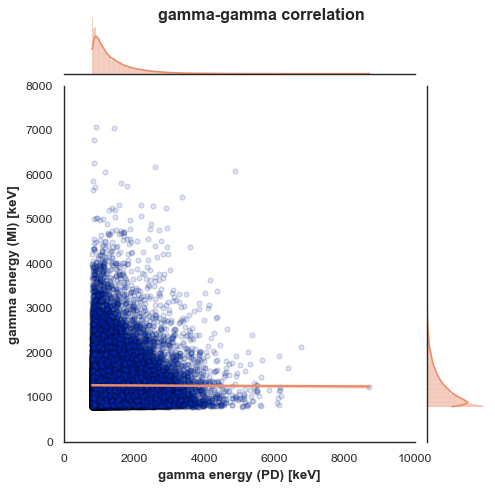

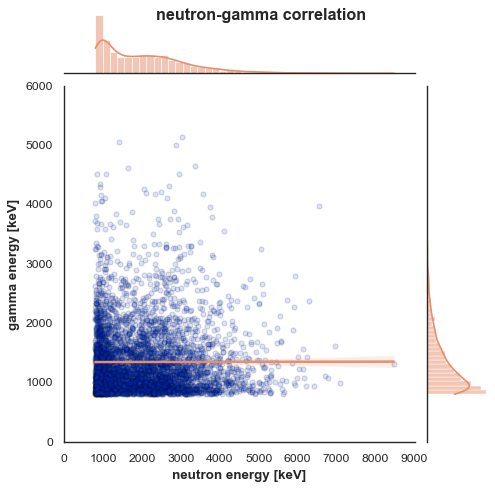

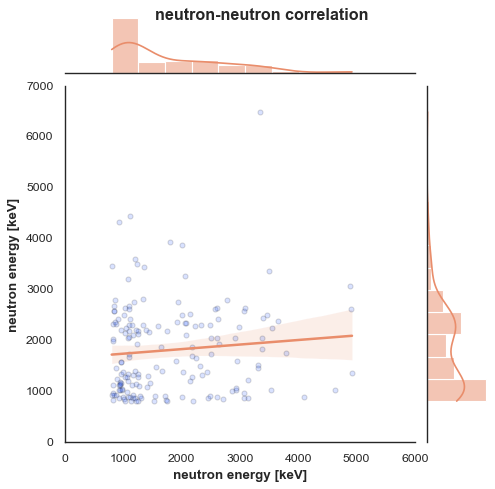

In [14]:
sns.set_theme(context = "notebook", style = "white", palette = "bright")
sns.set_palette("flare")

g = sns.jointplot(x = gg_energy[0], y = gg_energy[1], kind = "reg", scatter = False)
g.ax_joint.scatter(gg_energy[0], gg_energy[1], marker = "o", alpha = 0.15, edgecolors = "black")
g.ax_joint.set_xlabel("gamma energy (PD) [keV]", fontweight='bold')
g.ax_joint.set_ylabel("gamma energy (MI) [keV]", fontweight='bold')
g.fig.suptitle("gamma-gamma correlation", fontweight = "bold", fontsize = 14.5)

g.savefig("/Users/javi/Documents/Padova/2/AdvancedLab/AdvancedLab_22-23/plots/20220531/gg_correlation.pdf")

g = sns.jointplot(x = ng_energy[0], y = ng_energy[1], kind = "reg", scatter = False)
g.ax_joint.scatter(ng_energy[0], ng_energy[1], marker = "o", alpha = 0.15, edgecolors = "black")
g.ax_joint.set_xlabel("neutron energy [keV]", fontweight='bold')
g.ax_joint.set_ylabel("gamma energy [keV]", fontweight='bold')
g.fig.suptitle("neutron-gamma correlation", fontweight = "bold", fontsize = 14.5)

g.savefig("/Users/javi/Documents/Padova/2/AdvancedLab/AdvancedLab_22-23/plots/20220531/ng_correlation.pdf")


g = sns.jointplot(x = nn_energy[0], y = nn_energy[1], kind = "reg", scatter = False)
g.ax_joint.scatter(nn_energy[0], nn_energy[1], marker = "o", alpha = 0.15, edgecolors = "black")
g.ax_joint.set_xlabel("neutron energy [keV]", fontweight='bold')
g.ax_joint.set_ylabel("neutron energy [keV]", fontweight='bold')
g.fig.suptitle("neutron-neutron correlation", fontweight = "bold", fontsize = 14.5)

g.savefig("/Users/javi/Documents/Padova/2/AdvancedLab/AdvancedLab_22-23/plots/20220531/nn_correlation.pdf")

In [15]:
# get n-g energy spectrum 

# neutron energy detected in MI (with gamma detected in PD)
En_ng_coinc = np.array(df_final[(df_final["pID_MI"] == "neutron") & (df_final["pID_PD"] == "gamma")]["ENERGY_MI"], "float")
#coinc_neutron_energy = np.hstack((En_ng_coinc, En_gn_coinc))

# neutron energy detected in PD (with gamma detected in MI)
En_gn_coinc = np.array(df_final[(df_final["pID_MI"] == "gamma") & (df_final["pID_PD"] == "neutron")]["ENERGY_PD"], "float")


# get n-n energy spectrum

# neutron energy detected in MI (with neutron detected in PD)
En_nn_MI = np.array(df_final[(df_final["pID_MI"] == "neutron") & (df_final["pID_PD"] == "neutron")]["ENERGY_MI"], "float")

# neutron energy detected in PD (with neutron detected in MI)
En_nn_PD = np.array(df_final[(df_final["pID_MI"] == "neutron") & (df_final["pID_PD"] == "neutron")]["ENERGY_PD"], "float")


In [16]:
bins = 8192
xMin, xMax = 500, 8192

h_ng = r.TH1I("neutron MI", "", bins, 0, bins)
h_gn = r.TH1I("neutron PD", "", bins, 0, bins)

h_nn_MI = r.TH1I("neutron MI", "", bins, 0, bins)
h_nn_PD = r.TH1I("neutron PD", "", bins, 0, bins)


# fill ng histograms
for i in range(max(len(En_ng_coinc), len(En_gn_coinc))):

    if (len(En_ng_coinc) > len(En_gn_coinc)):
        h_ng.Fill(En_ng_coinc[i])

        if i < len(En_gn_coinc):
            h_gn.Fill(En_gn_coinc[i])
    
    else:
        h_gn.Fill(En_gn_coinc[i])

        if i < len(En_ng_coinc):
            h_ng.Fill(En_ng_coinc[i])

# fill nn histograms
for i in range(max(len(En_nn_MI), len(En_nn_PD))):

    if (len(En_nn_MI) > len(En_nn_PD)):
        h_nn_MI.Fill(En_nn_MI[i])

        if i < len(En_nn_PD):
            h_nn_PD.Fill(En_nn_PD[i])
    
    else:
        h_nn_PD.Fill(En_nn_PD[i])

        if i < len(En_nn_MI):
            h_nn_MI.Fill(En_nn_MI[i])

Warning in <TROOT::Append>: Replacing existing TH1: neutron MI (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: neutron PD (Potential memory leak).


In [17]:
h_ng.Rebin(64)
h_gn.Rebin(64)


h_nn_MI.Rebin(128)
h_nn_PD.Rebin(128)



h_ng.SetLineColor(867)
h_ng.SetFillColorAlpha(867, 0.4)

h_gn.SetLineColor(809)
h_gn.SetFillColorAlpha(809, 0.4)


h_nn_MI.SetLineColor(867)
h_nn_MI.SetFillColorAlpha(867, 0.4)

h_nn_PD.SetLineColor(809)
h_nn_PD.SetFillColorAlpha(809, 0.4)


hs = r.THStack("hs", "Gamma-correlated neutron spectrum")
hs.Add(h_ng)
hs.Add(h_gn)

hs2 = r.THStack("hs2", "Neutron-correlated neutron spectrum")
hs2.Add(h_nn_MI)
hs2.Add(h_nn_PD)



c1 = r.TCanvas("c1", "", 850, 500)
hs.Draw()
hs.GetXaxis().SetRangeUser(xMin, xMax)
hs.GetXaxis().SetTitle("neutron energy [keV]")
hs.GetYaxis().SetTitle("counts / %1.2f keV" % hs.GetXaxis().GetBinWidth(0))
c1.Draw()

legend = r.TLegend(0.529062, 0.615072, 0.957733, 0.902371)
legend.AddEntry(h_ng, "MI neutron energy", "f")
legend.AddEntry(h_gn, "PD neutron energy", "f")
legend.Draw()



c2 = r.TCanvas("c2", "", 850, 500)
hs2.Draw()
hs2.GetXaxis().SetRangeUser(xMin, xMax)
hs2.GetXaxis().SetTitle("neutron energy [keV]")
hs2.GetYaxis().SetTitle("counts / %1.2f keV" % hs2.GetXaxis().GetBinWidth(0))
c2.Draw()

legend2 = r.TLegend(0.529062, 0.615072, 0.957733, 0.902371)
legend2.AddEntry(h_nn_MI, "MI neutron energy", "f")
legend2.AddEntry(h_nn_PD, "PD neutron energy", "f")
legend2.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2


In [18]:
c1.SaveAs("/Users/javi/Documents/Padova/2/AdvancedLab/AdvancedLab_22-23/plots/20220531/ng_energy_spectrum.pdf")
c2.SaveAs("/Users/javi/Documents/Padova/2/AdvancedLab/AdvancedLab_22-23/plots/20220531/nn_energy_spectrum.pdf")

Info in <TCanvas::Print>: pdf file /Users/javi/Documents/Padova/2/AdvancedLab/AdvancedLab_22-23/plots/20220531/ng_energy_spectrum.pdf has been created
Info in <TCanvas::Print>: pdf file /Users/javi/Documents/Padova/2/AdvancedLab/AdvancedLab_22-23/plots/20220531/nn_energy_spectrum.pdf has been created
